# Preliminary analysis of collected data

## import libraries

In [1]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## read CSVs to dataframes

In [2]:
# news_media_basic_data

news_media_basic_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/news_media_twitter_username.csv')
news_media_basic_data.head()

,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum
0,ABC News,ABC,US,General,Left
1,ABC News,ABCNewsLive,US,General,Left
2,ABC News,ABCPolitics,US,Political,Left
3,BBC News,BBCBreaking,Foreign,General,Middle
4,BBC News,BBCNews,Foreign,General,Middle


In [3]:
# twitter_user_details_data

twitter_user_details_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_user_details.csv')
twitter_user_details_data.head()

,user_id,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified
0,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,17644680,486,393230,66112,True
1,384438102,ABC News Live,ABCNewsLive,2011-10-03 17:47:38+00:00,NaN,False,96020,242,36785,2240,True
2,16815644,ABC News Politics,ABCPolitics,2008-10-16 22:43:16+00:00,"Washington, DC",False,1079807,473,192830,8499,True
3,5402612,BBC Breaking News,BBCBreaking,2007-04-22 14:42:37+00:00,"London, UK",False,50727938,3,38184,147742,True
4,612473,BBC News (UK),BBCNews,2007-01-08 08:05:57+00:00,London,False,14276300,93,499300,49372,True


In [5]:
# twitter_combined_tweet_data from 2022/07/01 to 2022/08/15

twitter_combined_tweet_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_combined_tweet_data.csv')
twitter_combined_tweet_data.head()

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,tweet_like_count,tweet_quote_count,tweet_referenced_tweets
0,1543217089145716737,"Pentagon data shows a simple, troubling trend:...",28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185,288,471,108,NaN
1,1543211077772759042,Rescue services in Hong Kong say an industrial...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22,8,43,0,NaN
2,1543205864881983489,In the wake of the Supreme Court’s ruling on R...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22,20,65,1,NaN
3,1543200664024760321,If legislation banning or restricting abortion...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49,36,98,6,NaN
4,1543193997329457157,“We imagined this thing being a fairytale and ...,28785486,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11,8,59,0,NaN


## processing the data

In [6]:
# combine news_media_basic_data and twitter_user_details_data 
combined_news_media_basic_details = pd.merge(news_media_basic_data, twitter_user_details_data, left_on='twitter_username', right_on='user_username', how='left')

# combine combined_news_media_basic_details and tweets
combined_news_media_tweets_df = pd.merge(combined_news_media_basic_details, twitter_combined_tweet_data, left_on='user_id', right_on='tweet_author_id', how='left')

combined_news_media_tweets_df.head()

,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum,user_id,user_name,user_username,user_created_at,user_location,...,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,tweet_like_count,tweet_quote_count,tweet_referenced_tweets
0,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185.0,288.0,471.0,108.0,NaN
1,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22.0,8.0,43.0,0.0,NaN
2,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22.0,20.0,65.0,1.0,NaN
3,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49.0,36.0,98.0,6.0,NaN
4,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11.0,8.0,59.0,0.0,NaN


In [7]:
# format values

combined_news_media_tweets_df['tweet_created_at_date'] = pd.to_datetime(combined_news_media_tweets_df['tweet_created_at']).apply(lambda x: x.date())
combined_news_media_tweets_df.head()

,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum,user_id,user_name,user_username,user_created_at,user_location,...,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,tweet_like_count,tweet_quote_count,tweet_referenced_tweets,tweet_created_at_date
0,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185.0,288.0,471.0,108.0,NaN,2022-07-02
1,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22.0,8.0,43.0,0.0,NaN,2022-07-02
2,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22.0,20.0,65.0,1.0,NaN,2022-07-02
3,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49.0,36.0,98.0,6.0,NaN,2022-07-02
4,ABC News,ABC,US,General,Left,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,...,2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11.0,8.0,59.0,0.0,NaN,2022-07-02


## analyse combined data

In [21]:
# count total tweet and tweeted date per news media
analysis_1 = combined_news_media_tweets_df.groupby(['user_id',
                                                    'user_name',
                                                    'us_or_foreign',
                                                    'general_or_political',
                                                    'political_spectrum',
                                                    'user_followers_count',
                                                    'user_following_count',
                                                    'user_tweet_count'
                                                   ])['tweet_id','tweet_created_at_date'].nunique().add_prefix('count_').reset_index()

# calculate average tweet per day
analysis_1['average_tweet_per_day'] = round(analysis_1['count_tweet_id']/31,2)

# combined_tweets_2022_july_df.groupby(['user_id','user_name']).apply(lambda x: round(x['tweet_id'].nunique()/31)).reset_index(name ='Average Tweet per Day')
analysis_1.head(60)

/var/folders/kp/8gnd6lcn7y7df3py0t769c2r0000gn/T/ipykernel_1202/617617527.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analysis_1 = combined_news_media_tweets_df.groupby(['user_id',


,user_id,user_name,us_or_foreign,general_or_political,political_spectrum,user_followers_count,user_following_count,user_tweet_count,count_tweet_id,count_tweet_created_at_date,average_tweet_per_day
0,428333,CNN Breaking News,US,General,Left,63662926,121,78204,201,40,6.48
1,612473,BBC News (UK),Foreign,General,Middle,14276300,93,499300,3140,41,101.29
2,742143,BBC News (World),Foreign,General,Middle,37774379,18,349903,1726,41,55.68
3,759251,CNN,US,General,Left,59357266,1103,380866,3218,41,103.81
4,788524,Guardian news,Foreign,General,Left,3802981,1225,319705,3201,27,103.26
5,807095,The New York Times,US,General,Left,53885565,892,480652,3217,31,103.77
6,1367531,Fox News,US,General,Right,22228143,262,487553,3145,14,101.45
7,1652541,Reuters,Foreign,General,Middle,25471928,1236,894516,2400,6,77.42
8,1917731,The Hill,US,Political,Middle,4436643,305,1046391,3133,10,101.06
9,2467791,The Washington Post,US,General,Left,19648090,1716,434485,3202,29,103.29


In [10]:
combined_news_media_tweets_per_day_piv = combined_news_media_tweets_df.pivot_table(index=['tweet_created_at_date'], columns='user_name', 
values='tweet_id', aggfunc='nunique', fill_value=0)
combined_news_media_tweets_per_day_piv

user_name,ABC News,ABC News Live,ABC News Politics,BBC Breaking News,BBC News (UK),BBC News (World),BBC North America,Bloomberg,Bloomberg Politics,CBS News,...,The New York Times,The New Yorker,The Wall Street Journal,The Washington Post,The Washington Times,TheBlaze,USA TODAY,USA TODAY Politics,Vox,Washington Examiner
tweet_created_at_date,,,,,,,,,,,,,,,,,,,,,
2022-07-01,0,19,3,2,90,48,5,0,0,0,...,0,43,0,0,0,49,77,27,24,0
2022-07-02,24,3,2,0,56,28,2,0,0,0,...,0,41,0,0,0,18,36,8,16,0
2022-07-03,70,0,36,2,70,25,1,0,0,0,...,0,34,0,0,0,5,44,6,6,0
2022-07-04,78,37,21,5,100,60,3,0,0,0,...,0,47,0,0,0,21,38,13,5,0
2022-07-05,80,17,41,6,114,50,7,0,121,0,...,0,37,0,0,0,41,78,15,4,0
2022-07-06,93,20,44,4,125,42,4,0,158,0,...,0,35,0,0,0,63,72,18,26,0
2022-07-07,87,22,47,6,111,58,8,0,146,0,...,0,34,77,0,0,53,76,23,24,0
2022-07-08,106,14,19,5,90,48,7,0,135,0,...,0,34,96,0,0,64,78,18,18,0
2022-07-09,78,3,0,2,53,22,2,0,43,0,...,0,37,86,0,0,29,38,8,3,0


Text(0, 0.5, 'Tweets')

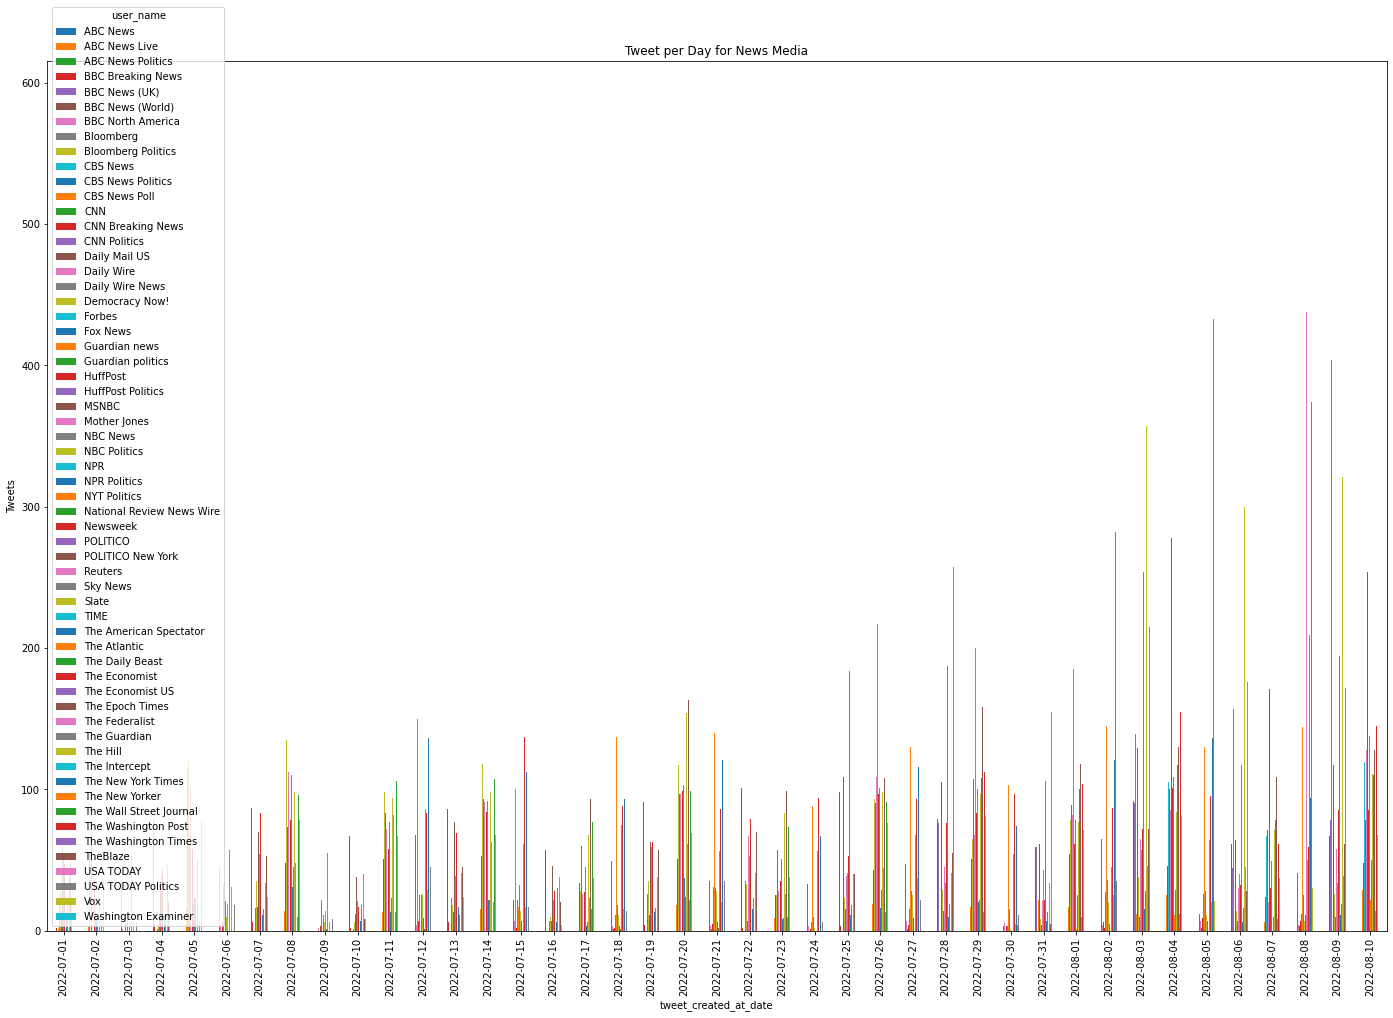

In [11]:
combined_news_media_tweets_per_day_piv.plot(kind='bar',figsize=(24,16))
plt.title("Tweet per Day for News Media")
plt.xlabel("tweet_created_at_date")
plt.ylabel("Tweets")

<AxesSubplot:xlabel='political_spectrum', ylabel='average_tweet_per_day'>

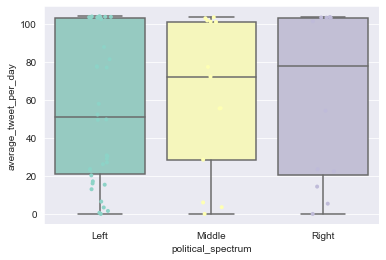

In [44]:
# tweet per day

sns.set_style("darkgrid")

sns.boxplot(x="political_spectrum", y="average_tweet_per_day", data=analysis_1)
sns.stripplot(x="political_spectrum", y="average_tweet_per_day", data=analysis_1,
              size=4, jitter=True, edgecolor="gray")

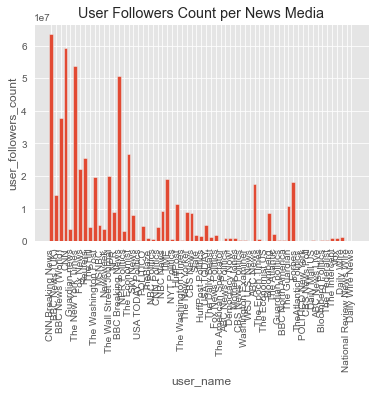

In [56]:
# user_followers_count per news media

plt.style.use('ggplot') 

# analysis_1[["user_name","political_spectrum","user_followers_count"]].plot(kind="bar",figsize=(24,16)).legend(
#     loc='upper center', ncol=3, title="political_spectrum")

plt.bar(analysis_1["user_name"],analysis_1["user_followers_count"])
plt.xticks(rotation='vertical')
plt.title("User Followers Count per News Media")
plt.xlabel("user_name")
plt.ylabel("user_followers_count")
plt.show()